## Import libraries, packages, Set paths

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
import subprocess
import re
import glob
import argparse
import shutil
import json
import nibabel as nib
from nilearn import plotting
from nilearn.image import load_img, mean_img, new_img_like, resample_to_img, threshold_img, high_variance_confounds
from nilearn import datasets
from nilearn import maskers
from nilearn import signal
from nipype.interfaces.fsl.utils import ImageMeants
from nilearn.glm.first_level import FirstLevelModel
from nilearn.interfaces.fsl import get_design_from_fslmat
from statsmodels.stats.outliers_influence import variance_inflation_factor
from nilearn.plotting import plot_stat_map, plot_glass_brain, plot_epi, plot_contrast_matrix
from nilearn.plotting import plot_design_matrix, plot_anat, plot_img, plot_roi


Pain Design Matrix from Group Analysis - May 2, 2023

In [ ]:
df_mca_pain = get_design_from_fslmat('/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/FSL_Pain/Gp_Ana-Pain_ME2_all_cope1_050223.gfeat/design.mat', column_names=None) 
df_mca_pain

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# compute thw sum of the columns in the design matrix 
df_mca_pain.sum(axis=0)
# df_mca_pain.sum(axis=0).plot(kind='bar')
# plt.show()
# print the sum of the columns in the design matrix
print(df_mca_pain.sum(axis=0))

0     50.0
1     17.0
2     17.0
3     17.0
4      2.0
5      2.0
6      2.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     2.0
14     2.0
15     2.0
16     2.0
17     2.0
18     2.0
19     2.0
20     2.0
21     2.0
22     2.0
23     2.0
24     2.0
25     2.0
26     2.0
27     2.0
28     2.0
29     2.0
30     2.0
31     2.0
32     2.0
33     2.0
34     2.0
35     2.0
36     2.0
37     2.0
38     2.0
39     2.0
dtype: float64


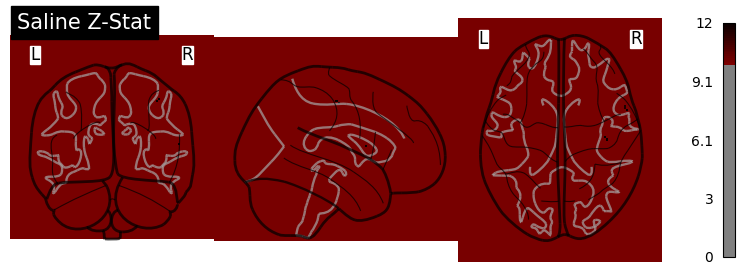

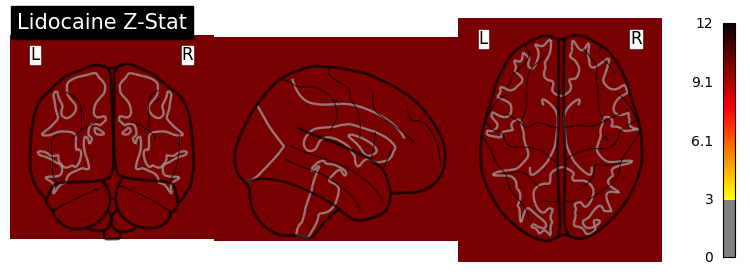

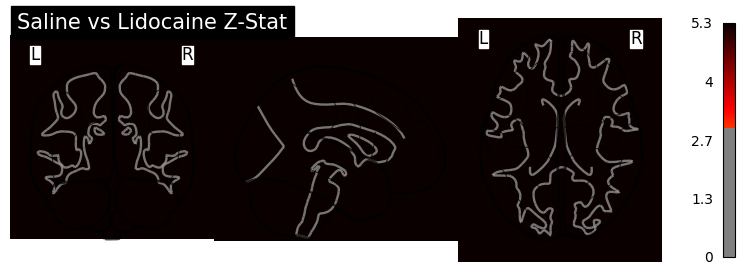

In [ ]:
# %matplotlib inline
from nilearn import plotting
# img = datasets.fetch_localizer_button_task()['tmap']
saline_z_avg='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat1.nii.gz'
plotting.plot_stat_map(saline_z_avg, threshold=, colorbar=True, title='Saline Z-Stat')
plotting.show()
lidocaine_z_avg='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat2.nii.gz'
plotting.plot_glass_brain(lidocaine_z_avg, threshold=3, colorbar=True, title='Lidocaine Z-Stat')
plotting.show()
salvsLid_z_diff='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat3.nii.gz'
plotting.plot_glass_brain(salvsLid_z_diff, threshold=3, colorbar=True, title='Saline vs Lidocaine Z-Stat')    
plotting.show()



### Surface Plots for group Z-stats - trial done with NLA data

In [ ]:
view = plotting.view_img_on_surf(saline_z_avg, black_bg=True , threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Saline Average Z-Stat') # symmetric_cmap=False)
view.open_in_browser()


In [ ]:
view = plotting.view_img_on_surf(lidocaine_z_avg, threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Lidocaine Average Z-Stat') # symmetric_cmap=False)
view.open_in_browser()

In [ ]:
view = plotting.view_img_on_surf(salvsLid_z_diff, threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Saline Vs Lidocaine Z-Stat') # symmetric_cmap=False)
view.open_in_browser()

## FDRMS MCA

In [2]:
MCA_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data'
MCA_Mem_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA*_Ses*/Mem*_func/MCA*_Ses*_Mem*'

MCA_Pain_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA*_Ses*/Pain_func/MCA*_Pain*'
# MCA_files = glob.glob(MCA_Mem_path)

In [3]:
# get all fdrms data from the path MCA_Mem_path as a list
fdrms = glob.glob(MCA_Mem_path + '_fdrms.txt')
fdrms.sort()
fdrms

['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses1/Mem1_func/MCA100_Ses1_Mem1_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses1/Mem2_func/MCA100_Ses1_Mem2_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses2/Mem1_func/MCA100_Ses2_Mem1_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses2/Mem2_func/MCA100_Ses2_Mem2_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses1/Mem1_func/MCA103_Ses1_Mem1_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses1/Mem2_func/MCA103_Ses1_Mem2_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses2/Mem1_func/MCA103_Ses2_Mem1_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses2/Mem2_func/MCA103_Ses2_Mem2_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses1/Mem1_func/MCA104_Ses1_Mem1_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses1/Mem2_func/MCA104_Ses1_Mem2_fdrms.txt',
 '/Volumes

In [5]:
len(fdrms)

297

In [4]:
# assign the column names as the subject IDs
subj_fdrms_labels = [os.path.basename(x)[:-10] for x in fdrms]
subj_fdrms_labels.sort()
subj_fdrms_labels

['MCA100_Ses1_Mem1',
 'MCA100_Ses1_Mem2',
 'MCA100_Ses2_Mem1',
 'MCA100_Ses2_Mem2',
 'MCA103_Ses1_Mem1',
 'MCA103_Ses1_Mem2',
 'MCA103_Ses2_Mem1',
 'MCA103_Ses2_Mem2',
 'MCA104_Ses1_Mem1',
 'MCA104_Ses1_Mem2',
 'MCA104_Ses2_Mem1',
 'MCA104_Ses2_Mem2',
 'MCA105_Ses1_Mem1',
 'MCA105_Ses1_Mem2',
 'MCA105_Ses2_Mem1',
 'MCA105_Ses2_Mem2',
 'MCA106_Ses1_Mem1',
 'MCA106_Ses1_Mem2',
 'MCA107_Ses1_Mem1',
 'MCA107_Ses1_Mem2',
 'MCA107_Ses2_Mem1',
 'MCA107_Ses2_Mem2',
 'MCA108_Ses1_Mem1',
 'MCA108_Ses1_Mem2',
 'MCA108_Ses2_Mem1',
 'MCA108_Ses2_Mem2',
 'MCA109_Ses1_Mem1',
 'MCA109_Ses1_Mem2',
 'MCA109_Ses2_Mem1',
 'MCA109_Ses2_Mem2',
 'MCA110_Ses1_Mem1',
 'MCA110_Ses1_Mem2',
 'MCA110_Ses2_Mem1',
 'MCA110_Ses2_Mem2',
 'MCA111_Ses1_Mem1',
 'MCA111_Ses1_Mem2',
 'MCA111_Ses2_Mem1',
 'MCA111_Ses2_Mem2',
 'MCA112_Ses1_Mem1',
 'MCA112_Ses1_Mem2',
 'MCA112_Ses2_Mem1',
 'MCA112_Ses2_Mem2',
 'MCA115_Ses1_Mem1',
 'MCA115_Ses1_Mem2',
 'MCA115_Ses2_Mem1',
 'MCA115_Ses2_Mem2',
 'MCA116_Ses1_Mem1',
 'MCA116_Ses1

In [6]:
# get all the data in the fdrms files as a dataframe
fdrms_data = [pd.read_csv(x, sep='\t', header=None) for x in fdrms]
fdrms_data

[            0
 0    0.000000
 1    0.051758
 2    0.087416
 3    0.043061
 4    0.030579
 ..        ...
 484  0.067931
 485  0.096503
 486  0.060160
 487  0.083441
 488  0.053518
 
 [489 rows x 1 columns],
             0
 0    0.000000
 1    0.025208
 2    0.047820
 3    0.046904
 4    0.136850
 ..        ...
 485  0.060050
 486  0.093570
 487  0.102896
 488  0.044686
 489  0.017365
 
 [490 rows x 1 columns],
             0
 0    0.000000
 1    0.044078
 2    0.059974
 3    0.040256
 4    0.078422
 ..        ...
 485  0.174250
 486  0.038048
 487  0.080618
 488  0.368922
 489  0.435357
 
 [490 rows x 1 columns],
             0
 0    0.000000
 1    0.024560
 2    0.155055
 3    0.094254
 4    0.018633
 ..        ...
 482  0.180474
 483  0.076002
 484  0.126075
 485  0.031945
 486  0.065602
 
 [487 rows x 1 columns],
             0
 0    0.000000
 1    0.043779
 2    0.123334
 3    0.338848
 4    0.297107
 ..        ...
 486  0.148185
 487  0.188569
 488  0.429731
 489  0.352746
 490  0

In [27]:
# print the shape of fdrms_data
for i in range(len(fdrms_data)):
    print(fdrms_data[i].shape)

(489, 1)
(490, 1)
(490, 1)
(487, 1)
(491, 1)
(500, 1)
(491, 1)
(491, 1)
(491, 1)
(495, 1)
(490, 1)
(486, 1)
(493, 1)
(502, 1)
(490, 1)
(490, 1)
(489, 1)
(487, 1)
(493, 1)
(502, 1)
(494, 1)
(490, 1)
(488, 1)
(493, 1)
(527, 1)
(491, 1)
(517, 1)
(489, 1)
(489, 1)
(486, 1)
(490, 1)
(488, 1)
(490, 1)
(495, 1)
(488, 1)
(488, 1)
(488, 1)
(487, 1)
(469, 1)
(488, 1)
(493, 1)
(487, 1)
(490, 1)
(490, 1)
(502, 1)
(488, 1)
(491, 1)
(487, 1)
(494, 1)
(488, 1)
(500, 1)
(500, 1)
(521, 1)
(489, 1)
(492, 1)
(488, 1)
(496, 1)
(498, 1)
(497, 1)
(495, 1)
(478, 1)
(500, 1)
(497, 1)
(494, 1)
(496, 1)
(526, 1)
(500, 1)
(496, 1)
(554, 1)
(501, 1)
(496, 1)
(496, 1)
(510, 1)
(496, 1)
(366, 1)
(493, 1)
(495, 1)
(498, 1)
(499, 1)
(499, 1)
(501, 1)
(498, 1)
(496, 1)
(497, 1)
(496, 1)
(497, 1)
(496, 1)
(500, 1)
(496, 1)
(500, 1)
(500, 1)
(497, 1)
(498, 1)
(509, 1)
(506, 1)
(495, 1)
(499, 1)
(501, 1)
(496, 1)
(498, 1)
(560, 1)
(502, 1)
(500, 1)
(495, 1)
(500, 1)
(500, 1)
(496, 1)
(495, 1)
(495, 1)
(494, 1)
(497, 1)
(

In [9]:
# append all the fdrms_data dataframes as columns to a new dataframe of shape (225, 56)
df_fdrms = pd.concat(fdrms_data, axis=1)

# assign the column names as the subject IDs
df_fdrms.columns = [os.path.basename(x)[:-10] for x in fdrms]
# df_fdrms.columns = [os.path.basename(x).split('_')[0]+os.path.basename(x).split('_')[1]+os.path.basename(x).split('_')[2] for x in fdrms]
# df_fdrms.columns = [os.path.basename(x) for x in fdrms]


df_fdrms

df_fdrms.shape


(560, 297)

In [10]:
df_fdrms

,MCA100_Ses1_Mem1,MCA100_Ses1_Mem2,MCA100_Ses2_Mem1,MCA100_Ses2_Mem2,MCA103_Ses1_Mem1,MCA103_Ses1_Mem2,MCA103_Ses2_Mem1,MCA103_Ses2_Mem2,MCA104_Ses1_Mem1,MCA104_Ses1_Mem2,...,MCA98_Ses2_Mem1,MCA98_Ses2_Mem2,MCA99_Ses1_Mem1,MCA99_Ses1_Mem2,MCA99_Ses2_Mem1,MCA99_Ses2_Mem2,MCA9_Ses1_Mem1,MCA9_Ses1_Mem2,MCA9_Ses2_Mem1,MCA9_Ses2_Mem2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.051758,0.025208,0.044078,0.024560,0.043779,0.222927,0.258172,0.123663,0.025006,0.183977,...,0.015100,0.029063,0.057904,0.032797,0.072008,0.062682,0.045842,0.118137,0.068502,0.100750
2,0.087416,0.047820,0.059974,0.155055,0.123334,0.187199,0.445384,0.272531,0.096810,0.262290,...,0.048440,0.103141,0.121583,0.014640,0.030956,0.015809,0.104058,0.263788,0.045707,0.040124
3,0.043061,0.046904,0.040256,0.094254,0.338848,0.378672,0.264898,0.211304,0.059855,0.101877,...,0.016589,0.036985,0.116696,0.058046,0.103648,0.070823,0.201098,0.101050,0.039851,0.076507
4,0.030579,0.136850,0.078422,0.018633,0.297107,0.303919,0.095540,0.129043,0.180335,0.036473,...,0.041852,0.059689,0.184705,0.051876,0.065863,0.066749,0.026884,0.100885,0.107239,0.142881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


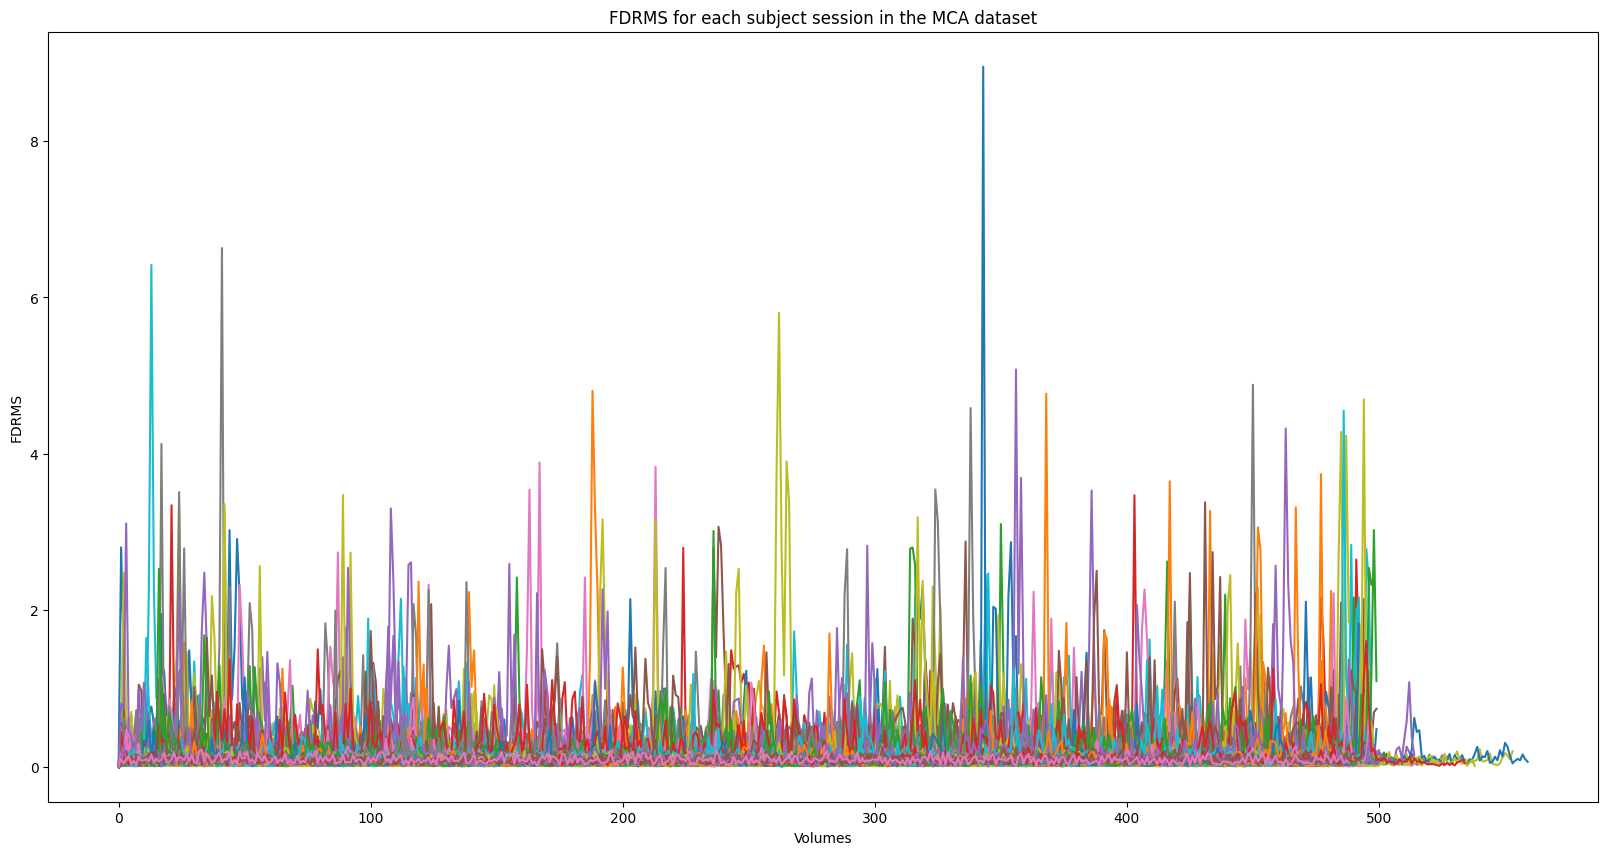

In [49]:
# plot the fdrms data from df_fdrms as a line plot 
plt.figure(figsize=(20, 10))
plt.plot(df_fdrms)
plt.title('FDRMS for each subject session in the MCA dataset')
plt.xlabel('Volumes')
plt.ylabel('FDRMS')
# plt.legend(df_fdrms.columns)
plt.show()

In [37]:
# show column names of the fdrms data that have values greater than 4
df_fdrms_4m_labels = df_fdrms.columns[df_fdrms.gt(4).any()]
df_fdrms_4m_labels


Index(['MCA17_Ses1_Mem2', 'MCA33_Ses1_Mem2', 'MCA46_Ses1_Mem1',
       'MCA52_Ses1_Mem2', 'MCA56_Ses2_Mem2', 'MCA58_Ses2_Mem1',
       'MCA76_Ses2_Mem2', 'MCA77_Ses1_Mem1', 'MCA81_Ses1_Mem1',
       'MCA81_Ses1_Mem2', 'MCA84_Ses2_Mem1', 'MCA8_Ses1_Mem1'],
      dtype='object')

In [5]:
df_fdrms_4m_labels = ['MCA17_Ses1_Mem2', 'MCA33_Ses1_Mem2', 'MCA46_Ses1_Mem1',
       'MCA52_Ses1_Mem2', 'MCA56_Ses2_Mem2', 'MCA58_Ses2_Mem1',
       'MCA76_Ses2_Mem2', 'MCA77_Ses1_Mem1', 'MCA81_Ses1_Mem1',
       'MCA81_Ses1_Mem2', 'MCA84_Ses2_Mem1', 'MCA8_Ses1_Mem1']

In [8]:
# get  list
df_fdrms_4m_labels

['MCA17_Ses1_Mem2',
 'MCA33_Ses1_Mem2',
 'MCA46_Ses1_Mem1',
 'MCA52_Ses1_Mem2',
 'MCA56_Ses2_Mem2',
 'MCA58_Ses2_Mem1',
 'MCA76_Ses2_Mem2',
 'MCA77_Ses1_Mem1',
 'MCA81_Ses1_Mem1',
 'MCA81_Ses1_Mem2',
 'MCA84_Ses2_Mem1',
 'MCA8_Ses1_Mem1']

In [105]:
# show column values of the columns in df_fdrms_4m_outliers
df_fdrms_4m_outliers = df_fdrms[df_fdrms_4m_labels]
df_fdrms_4m_outliers


,MCA17_Ses1_Mem2,MCA33_Ses1_Mem2,MCA46_Ses1_Mem1,MCA52_Ses1_Mem2,MCA56_Ses2_Mem2,MCA58_Ses2_Mem1,MCA76_Ses2_Mem2,MCA77_Ses1_Mem1,MCA81_Ses1_Mem1,MCA81_Ses1_Mem2,MCA84_Ses2_Mem1,MCA8_Ses1_Mem1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.060765,0.109630,0.348255,0.067176,0.050708,0.044081,0.102898,0.016362,0.080631,0.065683,0.083291,0.808675
2,0.077849,0.063053,2.480790,0.108178,0.044965,0.075338,0.121412,0.021602,0.130085,0.132283,0.115643,0.731622
3,0.069039,0.023582,0.621891,0.062791,0.073118,0.058257,0.164286,0.163831,0.051009,0.130370,0.034531,3.110600
4,0.083763,0.058993,0.363386,0.079898,0.092999,0.044161,0.337232,0.162396,0.087395,0.054020,0.054355,0.454019
...,...,...,...,...,...,...,...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# compute the mean, median, standard deviation of each column of the df_fdrms dataframe and save as new columns in the df_fdrms_stats dataframe
df_fdrms_stats = pd.DataFrame()
df_fdrms_stats['mean'] = df_fdrms.mean(axis=0)
df_fdrms_stats['median'] = df_fdrms.median(axis=0)
df_fdrms_stats['std'] = df_fdrms.std(axis=0)

# add row labels to the df_fdrms_stats dataframe from 1 to 54
df_fdrms_stats.index = range(1, 298)
df_fdrms_stats


,mean,median,std
1,0.066287,0.064377,0.023717
2,0.070285,0.066904,0.045266
3,0.072135,0.065789,0.060514
4,0.074241,0.053408,0.140193
5,0.292040,0.292149,0.135790
...,...,...,...
293,0.068481,0.054544,0.051158
294,0.083669,0.076036,0.041754
295,0.084800,0.083678,0.043212
296,0.088605,0.085765,0.043501


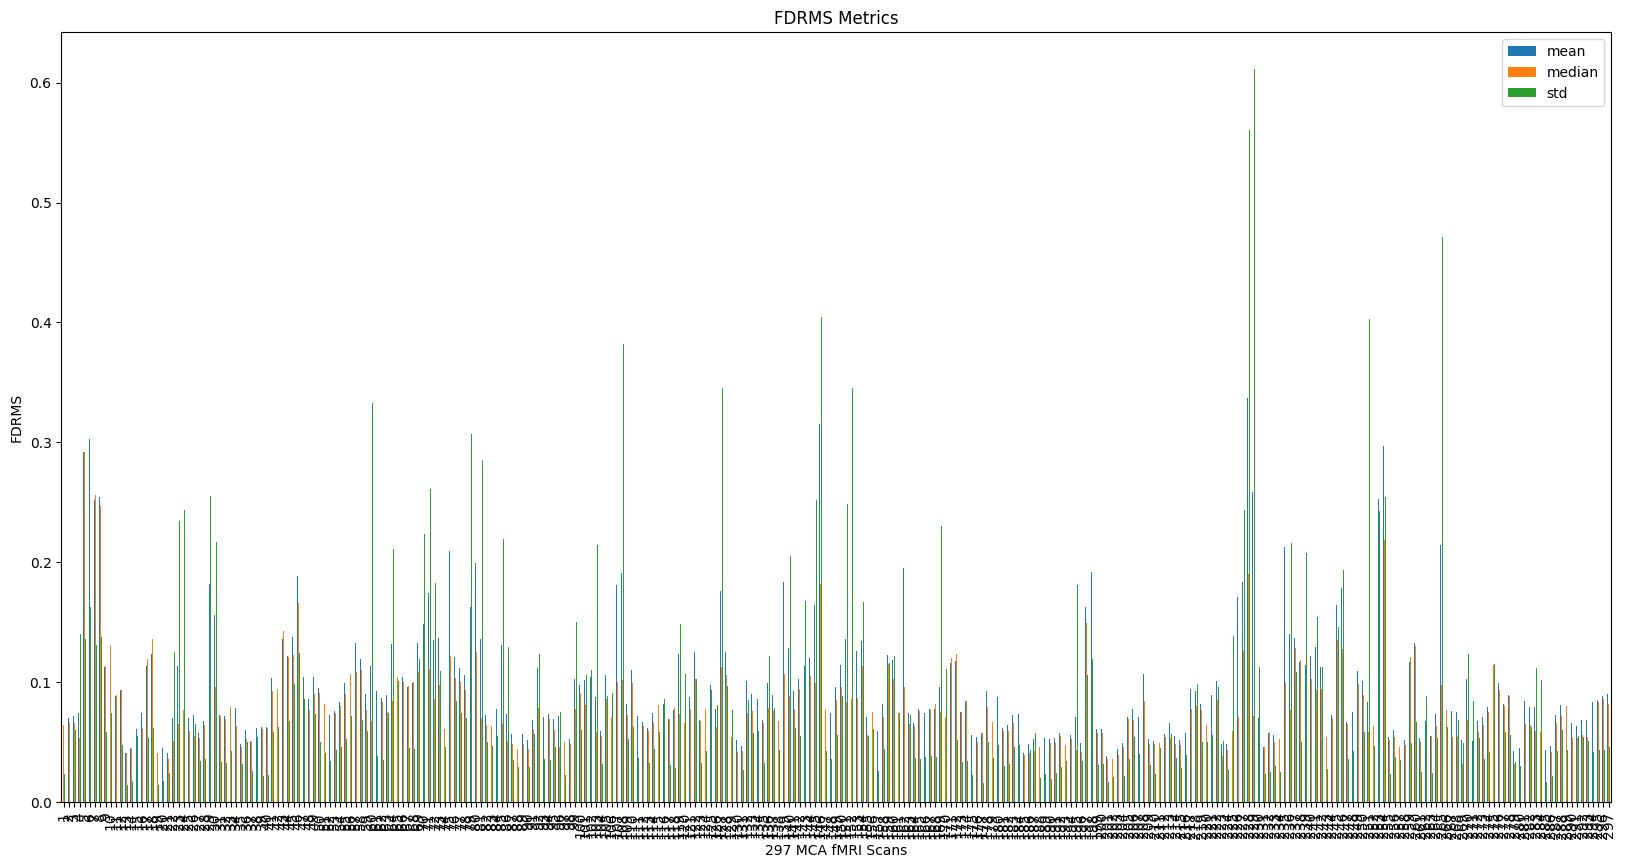

In [42]:
# plot the first column of df_fdrms_stats as a bar plot
df_fdrms_stats.plot(kind='bar', figsize=(20, 10))
plt.title('FDRMS Metrics')
plt.xlabel('297 MCA fMRI Scans')
plt.ylabel('FDRMS')
plt.show()


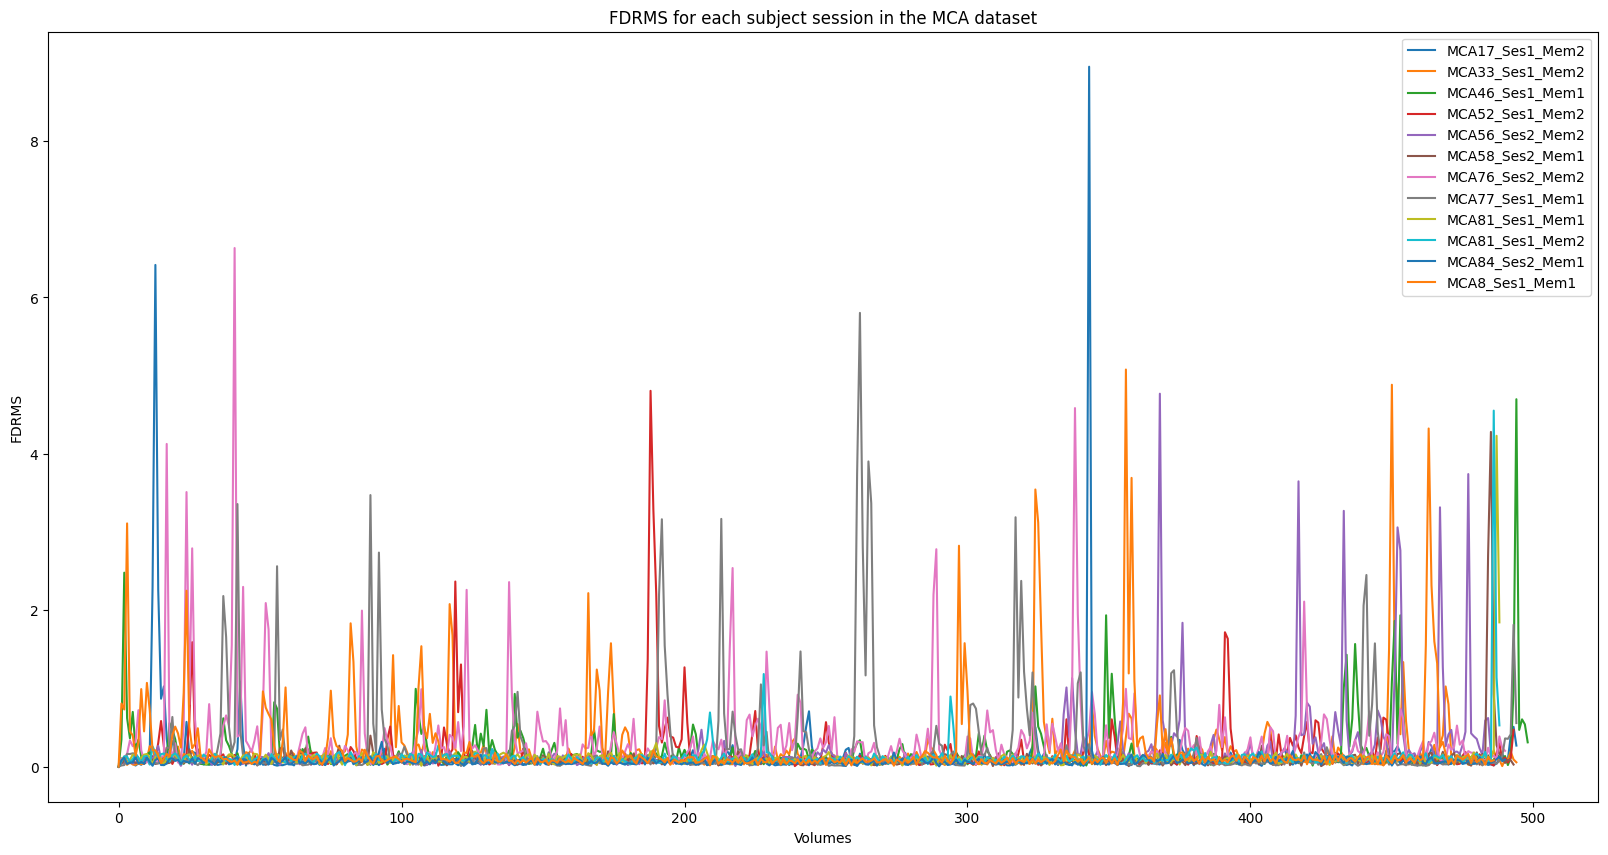

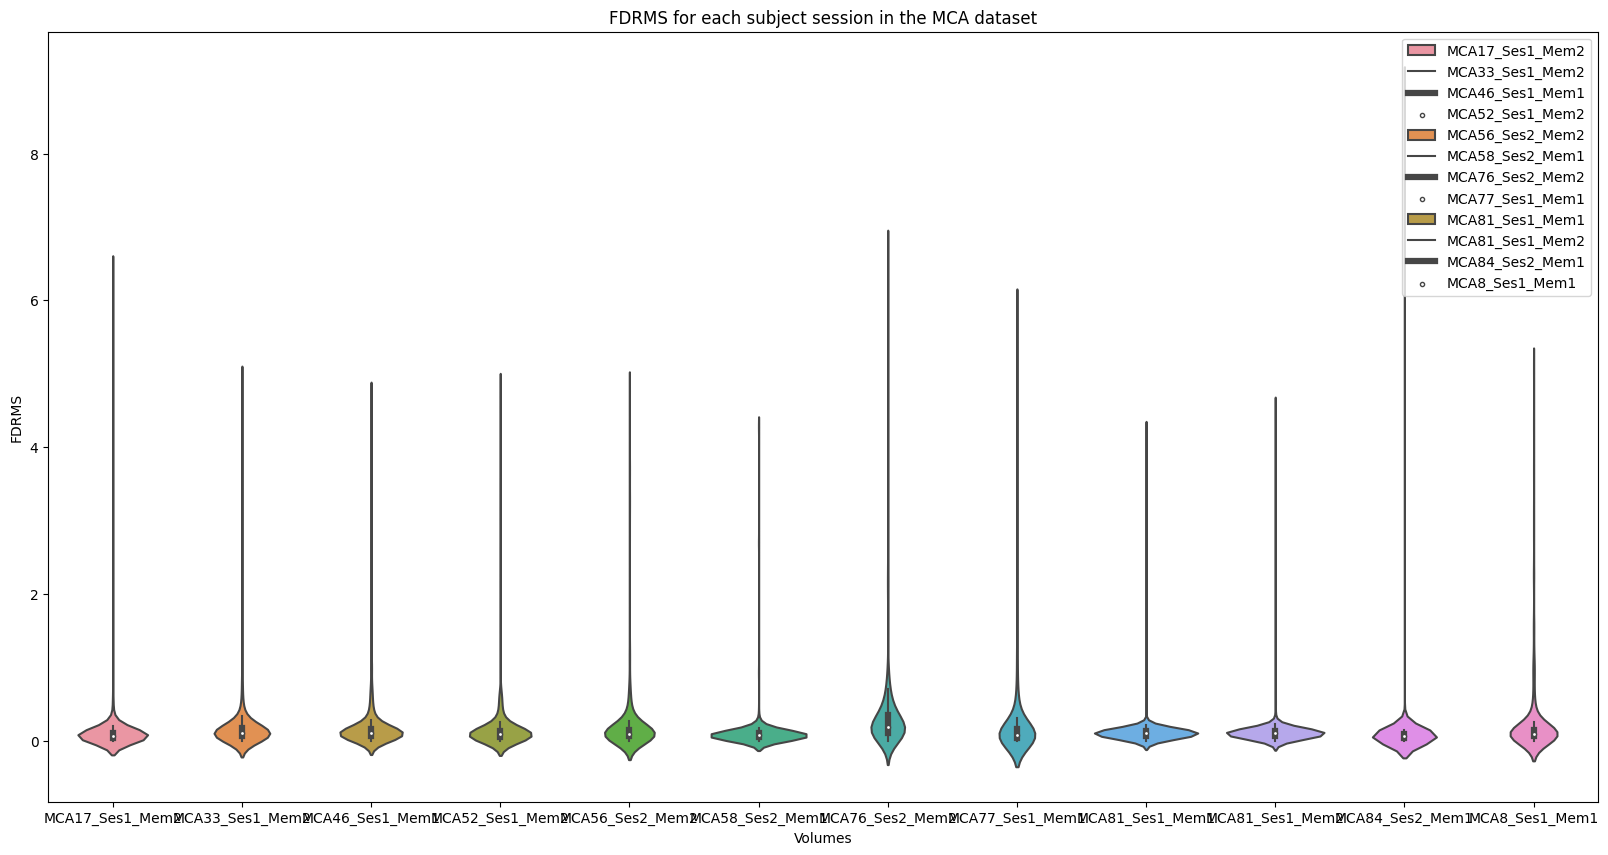

In [46]:
# plot each of the dataframes in df_fdrms_4m_outliers as a line plot
plt.figure(figsize=(20, 10))
plt.plot(df_fdrms_4m_outliers)
plt.title('FDRMS for each subject session in the MCA dataset')
plt.xlabel('Volumes')
plt.ylabel('FDRMS')
plt.legend(df_fdrms_4m_outliers.columns)
plt.show()

# plot the same as violin plots
plt.figure(figsize=(20, 10))
sns.violinplot(data=df_fdrms_4m_outliers)
plt.title('FDRMS for each subject session in the MCA dataset')
plt.xlabel('Volumes')
plt.ylabel('FDRMS')
plt.legend(df_fdrms_4m_outliers.columns)
plt.show()

## From email 04-08-2024 -Scrubbing >2mm FDRMS outliers for >1% of total data points


In [11]:
df_fdrms_2m_labels = ['MCA56_Ses2_Mem2', 'MCA76_Ses2_Mem2', 'MCA77_Ses1_Mem1', 'MCA8_Ses1_Mem1']
df_fdrms_2m_outliers = df_fdrms[df_fdrms_2m_labels]
df_fdrms_2m_outliers


,MCA56_Ses2_Mem2,MCA76_Ses2_Mem2,MCA77_Ses1_Mem1,MCA8_Ses1_Mem1
0,0.000000,0.000000,0.000000,0.000000
1,0.050708,0.102898,0.016362,0.808675
2,0.044965,0.121412,0.021602,0.731622
3,0.073118,0.164286,0.163831,3.110600
4,0.092999,0.337232,0.162396,0.454019
...,...,...,...,...
555,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN


In [12]:
# binarize the fdrms data in df_fdrms_2m_outliers by setting values less than 2 to 1 and values greater than 2 to 0
df_fdrms_2m_outliers_bin = df_fdrms_2m_outliers.lt(2).astype(int)
df_fdrms_2m_outliers_bin

,MCA56_Ses2_Mem2,MCA76_Ses2_Mem2,MCA77_Ses1_Mem1,MCA8_Ses1_Mem1
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,0
4,1,1,1,1
...,...,...,...,...
555,0,0,0,0
556,0,0,0,0
557,0,0,0,0
558,0,0,0,0


In [13]:
# get corrected.nii.gz from the path MCA_Mem_path as a list
MCA_data = [None] * len(df_fdrms_2m_labels)
MCA_Scans_FDRMS2mm = [None] * len(df_fdrms_2m_labels)
for i in range(len(df_fdrms_2m_labels)):
    MCA_data[i] = '/' + (df_fdrms_2m_labels[i]).split('_')[0] + '_' + (df_fdrms_2m_labels[i]).split('_')[1] + '_' + (df_fdrms_2m_labels[i]).split('_')[2] + '_corrected.nii.gz'
    MCA_Scans_FDRMS2mm[i] = glob.glob(MCA_path + '/' + (df_fdrms_2m_labels[i]).split('_')[0] + '_' + (df_fdrms_2m_labels[i]).split('_')[1] + '/' + (df_fdrms_2m_labels[i]).split('_')[2] + '_func' + MCA_data[i])

MCA_data.sort()
MCA_data
MCA_Scans_FDRMS2mm.sort()
MCA_Scans_FDRMS2mm

[['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA56_Ses2/Mem2_func/MCA56_Ses2_Mem2_corrected.nii.gz'],
 ['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA76_Ses2/Mem2_func/MCA76_Ses2_Mem2_corrected.nii.gz'],
 ['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA77_Ses1/Mem1_func/MCA77_Ses1_Mem1_corrected.nii.gz'],
 ['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA8_Ses1/Mem1_func/MCA8_Ses1_Mem1_corrected.nii.gz']]

In [16]:
# scrubbing the vols/ tpts from df_fdrms_2m_labels
from nilearn.image import get_data
import nibabel as nib
for i in range(len(MCA_Scans_FDRMS2mm)):
    MCA_Scan = load_img(MCA_Scans_FDRMS2mm[i])

    print(MCA_Scans_FDRMS2mm[i])
    print(MCA_Scan.shape)
    MCA_Scan = get_data(MCA_Scan)
    
    ind_keep = df_fdrms_2m_outliers_bin.iloc[:, i].astype(bool)
    # remove all values in ind_keep after MCA_Scan.shape[3]
    ind_keep = ind_keep[:MCA_Scan.shape[3]]
    MCA_Scan_Censored = MCA_Scan[:, :, :, ind_keep]

    MCA_Scan_Scrubbed = new_img_like(MCA_Scans_FDRMS2mm[i], MCA_Scan_Censored)
    MCA_Scan_Scrubbed.to_filename(MCA_Scans_FDRMS2mm[i][0][:-7] + '_scrubbed.nii.gz')

    print(MCA_Scan_Censored.shape)


['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA56_Ses2/Mem2_func/MCA56_Ses2_Mem2_corrected.nii.gz']
(110, 110, 60, 486)
(110, 110, 60, 479)
['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA76_Ses2/Mem2_func/MCA76_Ses2_Mem2_corrected.nii.gz']
(110, 110, 60, 491)
(110, 110, 60, 478)
['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA77_Ses1/Mem1_func/MCA77_Ses1_Mem1_corrected.nii.gz']
(110, 110, 60, 495)
(110, 110, 60, 478)
['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA8_Ses1/Mem1_func/MCA8_Ses1_Mem1_corrected.nii.gz']
(110, 110, 60, 487)
(110, 110, 60, 479)


As a post analysis from the first round of motion outlier detection, the above given four scans are run to create new motion outlier confounds file that would replace the original outlier confounds files since the volumes should correspond to the same number of remaining volumes after scrubbing/censoring. Alternatively, the scans can be censored from the analysis if the sample size can not significantly affect the power of the results. Notably, it is given that only 1% excession of the set 2mm FDRMS threshold have been scrubbed from the total volumes in the scan. The remaining volumes that are in the cutoff of 1.5 mm to 2 mm are being accounted for the newer set of analysis. For example, in subject MCA8, Memory task part 1 had 12 outliers that were beyond 1.5 mm FDRMS and there have been 3 volumes found to lie within the range of 1.5 mm to 2 mm which may or may not necessitate a new analysis. 

The second motion outlier detection for these scans can be done by running the script **MCA_Motion_Outliers.sh** for the scrubbed data.

##  Result/Figures/Data Viz.-- see pptx from 6/12/2024 on Pitt OneDrive MCA_FMRI

## Data Viz and Figures